<a href="https://colab.research.google.com/github/sebabecerra/DesafioLatam1/blob/Desarrollo/Solucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/sebabecerra/DesafioLatam.git

Cloning into 'DesafioLatam'...


In [2]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.optimize import curve_fit
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
%matplotlib inline
warnings.filterwarnings("ignore")

In [118]:
import pandas as pd
import numpy as np
df = pd.read_csv ('/content/drive/MyDrive/Challenge - Data Scientist /dataset_SCL.csv')


##Desafio

1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

In [119]:
print(df.columns)
print(df.dtypes)
df.tail()

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES'],
      dtype='object')
Fecha-I      object
Vlo-I        object
Ori-I        object
Des-I        object
Emp-I        object
Fecha-O      object
Vlo-O        object
Ori-O        object
Des-O        object
Emp-O        object
DIA           int64
MES           int64
AÑO           int64
DIANOM       object
TIPOVUELO    object
OPERA        object
SIGLAORI     object
SIGLADES     object
dtype: object


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68205,2017-12-31 14:55:00,400,SCEL,SPJC,JAT,2017-12-31 15:04:00,400.0,SCEL,SPJC,JAT,31,12,2017,Domingo,I,JetSmart SPA,Santiago,Lima


In [120]:
#distribucion por Cia
xcia = df.groupby(['OPERA']).agg({'Fecha-O': 'count'})
xcia = xcia.rename({'Fecha-O': 'Numero de Vuelos'}, axis=1)
xcia['%'] =(xcia['Numero de Vuelos']/ xcia['Numero de Vuelos'].sum()) * 100
xcia.sort_values(by=['Numero de Vuelos'], inplace=True , ascending=False)
print(xcia)

                          Numero de Vuelos          %
OPERA                                                
Grupo LATAM                          40892  59.953670
Sky Airline                          14298  20.962965
Aerolineas Argentinas                 1949   2.857520
Copa Air                              1850   2.712371
Latin American Wings                  1674   2.454330
Avianca                               1152   1.689001
JetSmart SPA                          1095   1.605431
Gol Trans                              806   1.181714
American Airlines                      757   1.109873
Air Canada                             565   0.828373
Iberia                                 362   0.530745
Delta Air                              358   0.524881
Air France                             358   0.524881
Aeromexico                             351   0.514617
United Airlines                        335   0.491159
Oceanair Linhas Aereas                 279   0.409055
Alitalia                    

Llama la atencion que el 70% de los vuelos estan concetrados en el Grupo Latam y en Sky airline.

In [121]:
#distribucion por x dia de la semana
xdia = df.groupby(['DIANOM']).agg({'Fecha-O': 'count'})
xdia = xdia.rename({'Fecha-O': 'Numero de Vuelos'}, axis=1)
xdia['%'] =(xdia['Numero de Vuelos']/ xdia['Numero de Vuelos'].sum()) * 100
xdia.sort_values(by=['Numero de Vuelos'], inplace=True , ascending=False)
print(xdia)

           Numero de Vuelos          %
DIANOM                                
Viernes               10292  15.089582
Jueves                10251  15.029470
Lunes                 10131  14.853532
Domingo                9796  14.362373
Miercoles              9722  14.253878
Martes                 9662  14.165909
Sabado                 8352  12.245257


In [122]:
#distribucion por x Origen
xorigen = df.groupby(['Ori-O']).agg({'Fecha-O': 'count'})
xorigen = xorigen.rename({'Fecha-O': 'Numero de Vuelos'}, axis=1)
xorigen['%'] =(xorigen['Numero de Vuelos']/ xorigen['Numero de Vuelos'].sum()) * 100
xorigen.sort_values(by=['Numero de Vuelos'], inplace=True , ascending=False)
print(xorigen)

       Numero de Vuelos      %
Ori-O                         
SCEL              68206  100.0


In [123]:
#distribucion por x Destino
pd.set_option('max_rows', 99999)
xdestino = df.groupby(['Des-O']).agg({'Fecha-O': 'count'})
xdestino = xdestino.rename({'Fecha-O': 'Numero de Vuelos'}, axis=1)
xdestino['%'] =(xdestino['Numero de Vuelos']/ xdestino['Numero de Vuelos'].sum()) * 100
xdestino.sort_values(by=['Numero de Vuelos'], inplace=True , ascending=False)
print(xdestino.head(10))

       Numero de Vuelos         %
Des-O                            
SCFA               5786  8.483125
SPJC               5270  7.726593
SCCF               5146  7.544791
SCTE               4357  6.388001
SCIE               3993  5.854324
SCDA               3747  5.493652
SBGR               3569  5.232677
SAEZ               3241  4.751781
SABE               3094  4.536258
SCQP               2589  3.795854


In [124]:
#distribucion por x Anio
pd.set_option('max_rows', 99999)
xanio = df.groupby(['AÑO']).agg({'Fecha-O': 'count'})
xanio = xanio.rename({'Fecha-O': 'Numero de Vuelos'}, axis=1)
xanio['%'] =(xanio['Numero de Vuelos']/ xanio['Numero de Vuelos'].sum()) * 100
xanio.sort_values(by=['Numero de Vuelos'], inplace=True , ascending=False)
print(xanio)

      Numero de Vuelos          %
AÑO                              
2017             68204  99.997068
2018                 2   0.002932


In [125]:
#distribucion por x meses
pd.set_option('max_rows', 99999)
xanio = df.groupby(['MES']).agg({'Fecha-O': 'count'})
xanio = xanio.rename({'Fecha-O': 'Numero de Vuelos'}, axis=1)
xanio['%'] =(xanio['Numero de Vuelos']/ xanio['Numero de Vuelos'].sum()) * 100
xanio.sort_values(by=['Numero de Vuelos'], inplace=True , ascending=False)
print(xanio)

     Numero de Vuelos         %
MES                            
12               6356  9.318828
1                6108  8.955224
11               6080  8.914172
10               6032  8.843797
7                5992  8.785151
8                5744  8.421546
9                5610  8.225083
2                5561  8.153242
3                5482  8.037416
5                5240  7.682609
4                5020  7.360056
6                4981  7.302877


In [126]:
#Format date
df['date'] = pd.to_datetime(df['Fecha-I']).dt.strftime('%Y-%m-%d')

In [127]:
#distribucion por x fecha
pd.set_option('max_rows', 9999999)
df['date'] = pd.to_datetime(df['Fecha-I']).dt.strftime('%Y-%m-%d')
xfecha = df.groupby(['date']).agg({'Fecha-O': 'count'})
xfecha = xfecha.rename({'Fecha-O': 'N_Vuelos'}, axis=1)
xfecha['%'] =(xfecha['N_Vuelos']/ xfecha['N_Vuelos'].sum()) * 100
xfecha.sort_values(by=['date'], inplace=True , ascending=True)
print(xfecha.head(10))

            N_Vuelos         %
date                          
2017-01-01       170  0.249245
2017-01-02       198  0.290297
2017-01-03       195  0.285899
2017-01-04       193  0.282966
2017-01-05       196  0.287365
2017-01-06       199  0.291763
2017-01-07       176  0.258042
2017-01-08       197  0.288831
2017-01-09       206  0.302026
2017-01-10       193  0.282966


(50.0, 250.0)

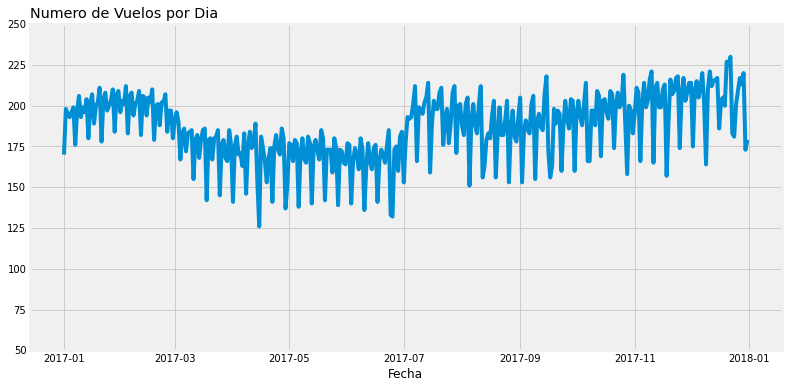

In [128]:
# Let's make sure 'date' is actually a date in pandas
xfecha['fecha'] = xfecha.index
xfecha["fecha"] = pd.to_datetime(xfecha["fecha"])
date = xfecha["fecha"]
value = xfecha["N_Vuelos"]
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(date, value)
plt.xlabel("Fecha")
plt.title("Numero de Vuelos por Dia", loc = 'left')
plt.ylim(50,250)



1.   Llama la atencion que el 70% de los vuelos estan concetrados en el Grupo Latam y en Sky airline.
2.   La distribucion por dia muestra que, en general, todos los dias tienen practicamente el mismo numero de vuelos. Sin embargo, es algo mayor los dias Jueves, Viernes y Lunes. El dia que registra la menos concetracion son los Sabados.
3. Todos los vuelos tioenen como origen SCEL.
4, Por destino la distribucion es mas homogena. Sin embargo, los tres primncipales destino son SCFA (Antofagasta), SPJC (Peru) y SCCF (Calama) respectivamente. 
4. La totalidad de los vuelos corresponden al 2017. Existen solo dois vuelos para el 2018.
5. Por meses del anio, los vuelos paracen tener una diostribucion homogenea.
Sin embargo los meses que acumalan marginalmente mas vuelos son Diciembre, Enero y Noviembre

## 2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :

1. temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
2. dif_min : diferencia en minutos entre Fecha-O y Fecha-I .
3. atraso_15 : 1 si dif_min > 15, 0 si no.
4. periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a
Fecha-I .


In [129]:
#Temporada Alta Julio
df['Temporada_Alta'] =  np.where(((df.date >= '2017-07-15') & (df.date <= '2017-07-31')) |
                          ((df.date >= '2017-09-11') & (df.date <= '2017-09-30')) |
                          ((df.date >= '2017-12-15') & (df.date <= '2018-03-03')) , 1, 0)

In [130]:
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'], format='%Y-%m-%d %H:%M:%S')
df['Fecha-O'] = pd.to_datetime(df['Fecha-O'], format='%Y-%m-%d %H:%M:%S')
df['dif_min'] =(df['Fecha-O']-df['Fecha-I']).dt.total_seconds() / 60
df['atraso_15'] =np.where(df.dif_min > 15,1,0)

In [131]:
df['Hora']=pd.to_datetime(df['Fecha-I']).dt.hour

In [132]:
conditions = [
   (df['Hora'] >= 5) & (df['Hora'] < 12),
   (df['Hora'] >= 12) & (df['Hora'] < 19),
   (df['Hora'] < 5) | (df['Hora'] >=19)
]
choices = ["manana", "tarde", "noche"]

In [133]:
df['periodo_dia'] = np.select(conditions, choices)

In [134]:
df=df.drop(["Hora"], axis=1)
df.to_csv('synthetic_features.csv')

In [135]:
df.tail(10)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,date,Temporada_Alta,dif_min,atraso_15,periodo_dia
68196,2017-12-25 20:11:00,305,SCEL,SCCI,JAT,2017-12-25 20:13:00,305.0,SCEL,SCCI,JAT,25,12,2017,Lunes,N,JetSmart SPA,Santiago,Punta Arenas,2017-12-25,1,2.0,0,noche
68197,2017-12-30 04:05:00,305,SCEL,SCCI,JAT,2017-12-30 04:00:00,305.0,SCEL,SCCI,JAT,30,12,2017,Sabado,N,JetSmart SPA,Santiago,Punta Arenas,2017-12-30,1,-5.0,0,noche
68198,2017-12-22 18:30:00,307,SCEL,SCCI,JAT,2017-12-22 18:47:00,307.0,SCEL,SCCI,JAT,22,12,2017,Viernes,N,JetSmart SPA,Santiago,Punta Arenas,2017-12-22,1,17.0,1,tarde
68199,2017-12-29 18:30:00,307,SCEL,SCCI,JAT,2017-12-29 18:31:00,307.0,SCEL,SCCI,JAT,29,12,2017,Viernes,N,JetSmart SPA,Santiago,Punta Arenas,2017-12-29,1,1.0,0,tarde
68200,2017-12-20 14:55:00,400,SCEL,SPJC,JAT,2017-12-20 15:11:00,400.0,SCEL,SPJC,JAT,20,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,2017-12-20,1,16.0,1,tarde
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,2017-12-22,1,46.0,1,tarde
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima,2017-12-25,1,16.0,1,tarde
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,2017-12-27,1,40.0,1,tarde
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,2017-12-29,1,13.0,0,tarde
68205,2017-12-31 14:55:00,400,SCEL,SPJC,JAT,2017-12-31 15:04:00,400.0,SCEL,SPJC,JAT,31,12,2017,Domingo,I,JetSmart SPA,Santiago,Lima,2017-12-31,1,9.0,0,tarde


##3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?

In [136]:
#tasa de atraso total
tasa_atraso=100*(sum(df.atraso_15)/len(df.atraso_15))
print("Total de Vuelos:", len(df.atraso_15))
print("Total de Vuelos Atrasados:", sum(df.atraso_15))
print("Tasa de Atraso Total:",tasa_atraso)

Total de Vuelos: 68206
Total de Vuelos Atrasados: 12614
Tasa de Atraso Total: 18.493974137172682


In [137]:
atrasoxciia = df.groupby(['OPERA']).agg({'atraso_15': ['sum', 'count']})
atrasoxciia = atrasoxciia.rename({'sum': 'Vuelos Atrasados'}, axis=1)
atrasoxciia = atrasoxciia.rename({'count': 'Vuelos Totales'}, axis=1)
atrasoxciia.columns = atrasoxciia.columns.droplevel()
atrasoxciia["Tasa de Atraso"] = 100*(atrasoxciia['Vuelos Atrasados']/atrasoxciia['Vuelos Totales'])
atrasoxciia.sort_values(by=['Tasa de Atraso'], inplace=True , ascending=False)
print(atrasoxciia)

                          Vuelos Atrasados  Vuelos Totales  Tasa de Atraso
OPERA                                                                     
Plus Ultra Lineas Aereas                30              49       61.224490
Qantas Airways                         113             195       57.948718
Air Canada                             258             565       45.663717
Latin American Wings                   681            1674       40.681004
Gol Trans                              287             806       35.607940
Avianca                                306            1152       26.562500
Aerolineas Argentinas                  468            1949       24.012314
Austral                                 15              74       20.270270
JetSmart SPA                           196            1095       17.899543
Grupo LATAM                           7306           40892       17.866575
Sky Airline                           2540           14298       17.764722
Oceanair Linhas Aereas   

In [138]:
atrasoxdes = df.groupby(['Des-O']).agg({'atraso_15': ['sum', 'count']})
atrasoxdes = atrasoxdes.rename({'sum': 'Vuelos Atrasados'}, axis=1)
atrasoxdes = atrasoxdes.rename({'count': 'Vuelos Totales'}, axis=1)
atrasoxdes.columns = atrasoxdes.columns.droplevel()
atrasoxdes["Tasa de Atraso"] = 100*(atrasoxdes['Vuelos Atrasados']/atrasoxdes['Vuelos Totales'])
atrasoxdes.sort_values(by=['Tasa de Atraso'], inplace=True , ascending=False)
print(atrasoxdes.head(10))

       Vuelos Atrasados  Vuelos Totales  Tasa de Atraso
Des-O                                                  
EGYP                  1               1      100.000000
SLCB                  1               1      100.000000
SEQM                  2               2      100.000000
SAWH                  4               6       66.666667
YSSY                113             194       58.247423
YMML                 21              39       53.846154
SAZS                  1               2       50.000000
SAAR                 54             136       39.705882
NZAA                135             361       37.396122
MDPC                 18              54       33.333333


In [139]:
atrasoxmes = df.groupby(['MES']).agg({'atraso_15': ['sum', 'count']})
atrasoxmes = atrasoxmes.rename({'sum': 'Vuelos Atrasados'}, axis=1)
atrasoxmes = atrasoxmes.rename({'count': 'Vuelos Totales'}, axis=1)
atrasoxmes.columns = atrasoxmes.columns.droplevel()
atrasoxmes["Tasa de Atraso"] = 100*(atrasoxmes['Vuelos Atrasados']/atrasoxmes['Vuelos Totales'])
atrasoxmes.sort_values(by=['Tasa de Atraso'], inplace=True , ascending=False)
print(atrasoxmes)

     Vuelos Atrasados  Vuelos Totales  Tasa de Atraso
MES                                                  
7                1758            5992       29.339119
12               1615            6356       25.409062
10               1363            6032       22.596154
11               1199            6080       19.720395
8                 996            5744       17.339833
9                 967            5610       17.237077
6                 852            4981       17.104999
1                 978            6108       16.011788
5                 827            5240       15.782443
2                 843            5561       15.159144
4                 585            5020       11.653386
3                 631            5482       11.510398


In [141]:
atrasoxdia = df.groupby(['DIANOM']).agg({'atraso_15': ['sum', 'count']})
atrasoxdia = atrasoxdia.rename({'sum': 'Vuelos Atrasados'}, axis=1)
atrasoxdia = atrasoxdia.rename({'count': 'Vuelos Totales'}, axis=1)
atrasoxdia.columns = atrasoxdia.columns.droplevel()
atrasoxdia["Tasa de Atraso"] = 100*(atrasoxdia['Vuelos Atrasados']/atrasoxdia['Vuelos Totales'])
atrasoxdia.sort_values(by=['Tasa de Atraso'], inplace=True , ascending=False)
print(atrasoxdia)

           Vuelos Atrasados  Vuelos Totales  Tasa de Atraso
DIANOM                                                     
Viernes                2285           10292       22.201710
Lunes                  2048           10131       20.215181
Jueves                 2045           10251       19.949273
Miercoles              1661            9722       17.084962
Martes                 1634            9662       16.911613
Sabado                 1363            8352       16.319444
Domingo                1578            9796       16.108616


In [142]:
atrasoxtemporada = df.groupby(['Temporada_Alta']).agg({'atraso_15': ['sum', 'count']})
atrasoxtemporada = atrasoxtemporada.rename({'sum': 'Vuelos Atrasados'}, axis=1)
atrasoxtemporada = atrasoxtemporada.rename({'count': 'Vuelos Totales'}, axis=1)
atrasoxtemporada.columns = atrasoxtemporada.columns.droplevel()
atrasoxtemporada["Tasa de Atraso"] = 100*(atrasoxtemporada['Vuelos Atrasados']/atrasoxtemporada['Vuelos Totales'])
atrasoxtemporada.sort_values(by=['Tasa de Atraso'], inplace=True , ascending=False)
print(atrasoxtemporada)

                Vuelos Atrasados  Vuelos Totales  Tasa de Atraso
Temporada_Alta                                                  
1                           2563           10516       24.372385
0                          10051           57690       17.422430


In [143]:
atraso_tipo_vuelo = df.groupby(['TIPOVUELO']).agg({'atraso_15': ['sum', 'count']})
atraso_tipo_vuelo = atraso_tipo_vuelo.rename({'sum': 'Vuelos Atrasados'}, axis=1)
atraso_tipo_vuelo = atraso_tipo_vuelo.rename({'count': 'Vuelos Totales'}, axis=1)
atraso_tipo_vuelo.columns = atraso_tipo_vuelo.columns.droplevel()
atraso_tipo_vuelo["Tasa de Atraso"] = 100*(atraso_tipo_vuelo['Vuelos Atrasados']/atraso_tipo_vuelo['Vuelos Totales'])
atraso_tipo_vuelo.sort_values(by=['Tasa de Atraso'], inplace=True , ascending=False)
print(atraso_tipo_vuelo)

           Vuelos Atrasados  Vuelos Totales  Tasa de Atraso
TIPOVUELO                                                  
I                      7048           31240       22.560819
N                      5566           36966       15.057079


##4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo. Siéntete libre de generar variables adicionales y/o complementar con variables externas.

In [144]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [145]:
df.tail()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,date,Temporada_Alta,dif_min,atraso_15,periodo_dia
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,2017-12-22,1,46.0,1,tarde
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima,2017-12-25,1,16.0,1,tarde
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,2017-12-27,1,40.0,1,tarde
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,2017-12-29,1,13.0,0,tarde
68205,2017-12-31 14:55:00,400,SCEL,SPJC,JAT,2017-12-31 15:04:00,400.0,SCEL,SPJC,JAT,31,12,2017,Domingo,I,JetSmart SPA,Santiago,Lima,2017-12-31,1,9.0,0,tarde


In [158]:
#dataset con variables relevantes solamente
df2 = df.drop(["Fecha-I", "Vlo-I", "Ori-I",
               "Des-I", "Emp-I", "Fecha-O",
               "Vlo-I", "Ori-O", "Des-O", 
               "Emp-O","SIGLAORI", "Vlo-O", "date", 'dif_min', "DIA", "MES", "AÑO", "OPERA"], axis=1)

In [159]:
df2.tail(10)

,DIANOM,TIPOVUELO,SIGLADES,Temporada_Alta,atraso_15,periodo_dia
68196,Lunes,N,Punta Arenas,1,0,noche
68197,Sabado,N,Punta Arenas,1,0,noche
68198,Viernes,N,Punta Arenas,1,1,tarde
68199,Viernes,N,Punta Arenas,1,0,tarde
68200,Miercoles,I,Lima,1,1,tarde
68201,Viernes,I,Lima,1,1,tarde
68202,Lunes,I,Lima,1,1,tarde
68203,Miercoles,I,Lima,1,1,tarde
68204,Viernes,I,Lima,1,0,tarde
68205,Domingo,I,Lima,1,0,tarde


In [160]:
df2=pd.get_dummies(df2,columns=['DIANOM', 'TIPOVUELO','SIGLADES', 'periodo_dia'])

#Entrenando Modelos

In [161]:
X=df2.drop(['atraso_15'], axis=1)
y=df2['atraso_15']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123,
                                                    train_size=0.7)

In [162]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

##Regresion Logistica

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     16678
           1       0.54      0.01      0.02      3784

    accuracy                           0.82     20462
   macro avg       0.68      0.50      0.46     20462
weighted avg       0.76      0.82      0.74     20462

                  Attribute  Importance
65          SIGLADES_Sydney    1.655438
42       SIGLADES_Melbourne    1.370234
69          SIGLADES_Ushuia    1.201529
61         SIGLADES_Rosario    1.035458
56      SIGLADES_Punta Cana    0.947951
54  SIGLADES_Puerto Stanley    0.570439
62  SIGLADES_San Juan, Arg.    0.558486
25      SIGLADES_Cochabamba    0.543055
28         SIGLADES_Cordoba    0.531494
14   SIGLADES_Auckland N.Z.    0.527660


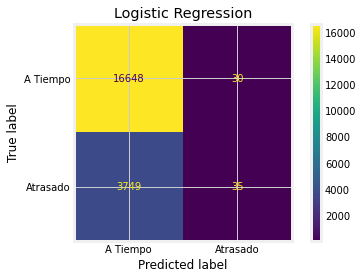

In [192]:
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)
model_LR_pred = model_LR.predict(X_test)
importances_LR = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model_LR.coef_[0]
})
importances_LR = importances_LR.sort_values(by='Importance', ascending=False)
model_LR_acc = model_LR.score(X_test, y_test)
print(classification_report(y_test, model_LR_pred))
conf_mat_plot = plot_confusion_matrix(model_LR, X_test, y_test)
plt.title("Logistic Regression")
plt.xticks(np.arange(2) , ["A Tiempo", "Atrasado"])
plt.yticks(np.arange(2) , ["A Tiempo", "Atrasado"])
print(conf_mat_plot)
print(importances_LR.head(10))

##Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     16678
           1       0.49      0.03      0.06      3784

    accuracy                           0.81     20462
   macro avg       0.65      0.51      0.48     20462
weighted avg       0.76      0.81      0.74     20462

                    Attribute  Importance
8                 TIPOVUELO_I    0.116446
24  SIGLADES_Ciudad de Panama    0.066865
73          periodo_dia_noche    0.055110
0              Temporada_Alta    0.047896
7              DIANOM_Viernes    0.041632
2               DIANOM_Jueves    0.037216
3                DIANOM_Lunes    0.034885
5            DIANOM_Miercoles    0.034585
65            SIGLADES_Sydney    0.032515
1              DIANOM_Domingo    0.032262


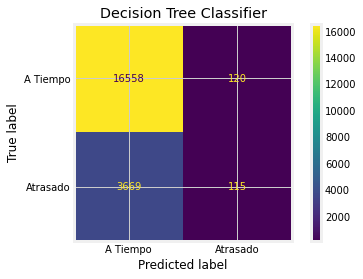

In [199]:
model_TC = DecisionTreeClassifier()
model_TC.fit(X_train, y_train)
#model_TC.fit(X_train_scaled, y_train)
model_TC_pred = model_TC.predict(X_test)
importances_TC = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model_TC.feature_importances_
})
importances_TC = importances_TC.sort_values(by='Importance', ascending=False)
print(classification_report(y_test, model_TC_pred))
conf_mat_plot = plot_confusion_matrix(model_TC, X_test, y_test)
plt.title("Decision Tree Classifier")
plt.xticks(np.arange(2) , ["A Tiempo", "Atrasado"])
plt.yticks(np.arange(2) , ["A Tiempo", "Atrasado"])
print(conf_mat_plot)
print(importances_TC.head(10))

##XGBoost

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     16678
           1       0.50      0.01      0.01      3784

    accuracy                           0.82     20462
   macro avg       0.66      0.50      0.46     20462
weighted avg       0.76      0.82      0.73     20462

          Attribute  Importance
0    Temporada_Alta    0.082296
1    DIANOM_Domingo    0.016534
2     DIANOM_Jueves    0.026091
3      DIANOM_Lunes    0.034231
4     DIANOM_Martes    0.002122
5  DIANOM_Miercoles    0.009194
6     DIANOM_Sabado    0.016969
7    DIANOM_Viernes    0.028766
8       TIPOVUELO_I    0.111759
9       TIPOVUELO_N    0.094544


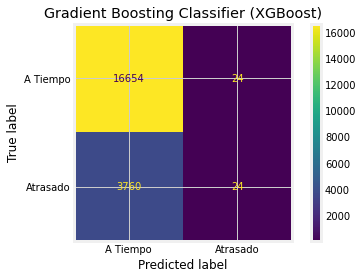

In [210]:
model_XGB = GradientBoostingClassifier()
model_XGB.fit(X_train, y_train)
#model_XGB.fit(X_train_scaled, y_train)
model_XGB_pred = model_XGB.predict(X_test)

importances_XGB = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model_XGB.feature_importances_
})
print(classification_report(y_test, model_XGB_pred))
conf_mat_plot = plot_confusion_matrix(model_XGB, X_test, y_test)
plt.title("Gradient Boosting Classifier (XGBoost)")
plt.xticks(np.arange(2) , ["A Tiempo", "Atrasado"])
plt.yticks(np.arange(2) , ["A Tiempo", "Atrasado"])
print(conf_mat_plot)
print(importances_XGB.head(10))

##Random Forest

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     16678
           1       0.47      0.04      0.07      3784

    accuracy                           0.81     20462
   macro avg       0.65      0.51      0.48     20462
weighted avg       0.76      0.81      0.74     20462

          Attribute  Importance
0    Temporada_Alta    0.085822
1    DIANOM_Domingo    0.034450
2     DIANOM_Jueves    0.034188
3      DIANOM_Lunes    0.038705
4     DIANOM_Martes    0.029972
5  DIANOM_Miercoles    0.032415
6     DIANOM_Sabado    0.036855
7    DIANOM_Viernes    0.032305
8       TIPOVUELO_I    0.034976
9       TIPOVUELO_N    0.035246


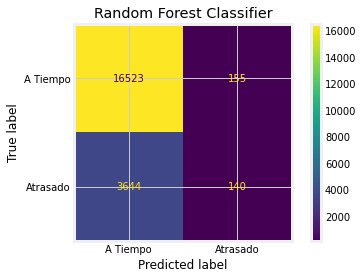

In [197]:
model_RF = RandomForestClassifier()
model_RF.fit(X_train, y_train)
#model_RF.fit(X_train_scaled, y_train)
model_RF_pred = model_RF.predict(X_test)
importances_RF = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model_RF.feature_importances_
})
print(classification_report(y_test, model_RF_pred))
conf_mat_plot = plot_confusion_matrix(model_RF, X_test, y_test)
plt.xticks(np.arange(2) , ["A Tiempo", "Atrasado"])
plt.yticks(np.arange(2) , ["A Tiempo", "Atrasado"])
plt.title("Random Forest Classifier")
print(conf_mat_plot)
print(importances_RF.head(10))

##Extra Trees Classifier

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     16678
           1       0.49      0.03      0.06      3784

    accuracy                           0.81     20462
   macro avg       0.65      0.51      0.48     20462
weighted avg       0.76      0.81      0.74     20462

          Attribute  Importance
0    Temporada_Alta    0.080094
1    DIANOM_Domingo    0.033686
2     DIANOM_Jueves    0.029899
3      DIANOM_Lunes    0.036113
4     DIANOM_Martes    0.024030
5  DIANOM_Miercoles    0.027979
6     DIANOM_Sabado    0.032476
7    DIANOM_Viernes    0.030529
8       TIPOVUELO_I    0.040117
9       TIPOVUELO_N    0.050671


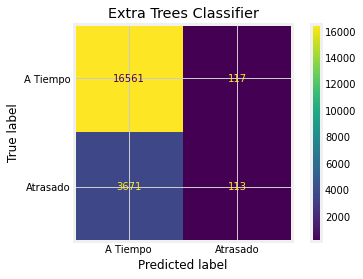

In [200]:
model_ETC = ExtraTreesClassifier()
model_ETC.fit(X_train, y_train)
#model_ETC.fit(X_train_scaled, y_train)
model_ETC_pred = model_ETC.predict(X_test)
importances_ETC = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model_ETC.feature_importances_
})

# print(confusion_matrix(y_test, model_ETC_pred))
print(classification_report(y_test, model_ETC_pred))
conf_mat_plot = plot_confusion_matrix(model_ETC, X_test, y_test)
plt.xticks(np.arange(2) , ["A Tiempo", "Atrasado"])
plt.yticks(np.arange(2) , ["A Tiempo", "Atrasado"])
plt.title("Extra Trees Classifier")
print(conf_mat_plot)
print(importances_ETC.head(10))

In [73]:
perf_df = pd.DataFrame(columns=["Regressors", "MSE", "RMSE", "MAE", "R2"])
def print_metrics(labels_test, model_pred, regressor_name, perf_df):
    
    mse = mean_squared_error(labels_test, model_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(labels_test, model_pred)
    r2 = r2_score(labels_test, model_pred)
    
    print(f"MSE      : {mse}", end="\n\n")
    print(f"RMSE     : {rmse}", end="\n\n")
    print(f"MAE      : {mae}", end="\n\n")
    print(f"R2 Score : {r2}", end="\n\n")
    
    perf_df = perf_df.append({"Regressors": regressor_name,
                                        "MSE": mse, 
                                        "RMSE": rmse,
                                        "MAE": mae,
                                        "R2": r2}, ignore_index=True)
    return perf_df

In [74]:
df3 = df.drop(["Fecha-I", "Vlo-I", "Ori-I",
               "Des-I", "Emp-I", "Fecha-O",
               "Vlo-I", "Ori-O", "Des-O", 
               "Emp-O","SIGLAORI", "Vlo-O", "date", 'atraso_15'], axis=1)

##5. Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué
elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar la
performance?

1. Para evaluar el modelo me basare en el accuracy, en la presicion, en recall y F1-Score.

2. Todos los modelos utilizados tienen un buen desempeno con un acuracy sobre 80%.

3. Se Utilizaron estos algoritmos dado que es una variable dicotomica y queremos estimar la probabilidad de retraso.

In [215]:
print(print("\n Regresion Logistica:\n",classification_report(y_test, model_LR_pred)))
print(print("\n Decision Tree Classifier:\n",classification_report(y_test, model_TC_pred)))
print(print("\n XGBoost:\n",classification_report(y_test, model_XGB_pred)))
print(print("\n Random Forest:\n",classification_report(y_test, model_RF_pred)))
print(print("\n Extra Trees Classifier:\n",classification_report(y_test, model_ETC_pred)))


 Regresion Logistica:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90     16678
           1       0.54      0.01      0.02      3784

    accuracy                           0.82     20462
   macro avg       0.68      0.50      0.46     20462
weighted avg       0.76      0.82      0.74     20462

None

 Decision Tree Classifier:
               precision    recall  f1-score   support

           0       0.82      0.99      0.90     16678
           1       0.49      0.03      0.06      3784

    accuracy                           0.81     20462
   macro avg       0.65      0.51      0.48     20462
weighted avg       0.76      0.81      0.74     20462

None

 XGBoost:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90     16678
           1       0.50      0.01      0.01      3784

    accuracy                           0.82     20462
   macro avg       0.66      0.50      0.46     20462

4. En general las variables mas relevantes son el destino del vuelo, el dia de la semana (lunes, martes.., etc), si el vuelo es en temporada alta o no y en que momento del dia es vuelo (manana, tarde, noche). Dependiendo del modelo tamnbien gana importancia el tipo de vuelo (nacional o internacional). Esto se puede ver en la tabla mas abajo.


In [214]:
print("\n Features mas importante Regresion Logistica:\n", "\n",importances_LR.head(10))
print("\n Features mas importante Decision Tree Classifier :\n", "\n",importances_TC.head(10))
print("\n Features mas importante XGBoost :\n", "\n",importances_XGB.head(10))
print("\n Features mas importante Random Forest :\n", "\n",importances_RF.head(10))
print("\n Extra Trees Classifier:\n", "\n", importances_ETC.head(10))


 Features mas importante Regresion Logistica:
 
                   Attribute  Importance
65          SIGLADES_Sydney    1.655438
42       SIGLADES_Melbourne    1.370234
69          SIGLADES_Ushuia    1.201529
61         SIGLADES_Rosario    1.035458
56      SIGLADES_Punta Cana    0.947951
54  SIGLADES_Puerto Stanley    0.570439
62  SIGLADES_San Juan, Arg.    0.558486
25      SIGLADES_Cochabamba    0.543055
28         SIGLADES_Cordoba    0.531494
14   SIGLADES_Auckland N.Z.    0.527660

 Features mas importante Decision Tree Classifier :
 
                     Attribute  Importance
8                 TIPOVUELO_I    0.116446
24  SIGLADES_Ciudad de Panama    0.066865
73          periodo_dia_noche    0.055110
0              Temporada_Alta    0.047896
7              DIANOM_Viernes    0.041632
2               DIANOM_Jueves    0.037216
3                DIANOM_Lunes    0.034885
5            DIANOM_Miercoles    0.034585
65            SIGLADES_Sydney    0.032515
1              DIANOM_Domingo    0

5. Para mejorar el permance de los modelos podemos incluir varibales adicional como, por ejemplo, una prediccion o estimacion del clima.